# Aircraft Risk Analysis for Business Expansion

## Introduction

We will analyse historical aviation accident data to identify aircraft models with the lowest risk profile. Using a dataset pulled from the [National Transportation Safety Board](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) (NTSB) covering aviation accidents from 1962 to 2022, we will assess key factors contributing to aircraft incidents and determine which aircraft types are safest for a new aviation division.

# Approach

To achieve this, we will:

 - Clean and preprocess the dataset, handling missing values and ensuring data integrity.
 - Analyze risk factors such as accident frequency, severity, aircraft type, and operational conditions.
 - Develop visual insights tto showcase insights and facilitate data-driven decision-making.

# 1. Data preprocessing

Importing the libraries and loading the files

In [1]:
#Import Standard Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file then printing the first 5 rows
# Read the CSV file into a DataFrame
AviationData= pd.read_csv('AviationData.csv', encoding='latin1') # add engine

# Create a working copy of the DataFrame
aviation_df = AviationData.copy()

# Display the first few rows of the working copy
aviation_df.head()

/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_42953/2651169434.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  AviationData= pd.read_csv('AviationData.csv', encoding='latin1') # add engine


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Getting to know the data

In [3]:
# looking at the number of rows and columns

aviation_df.shape

(88889, 31)

In [4]:
# looking at column names

aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# looking at data types and rows with missing values
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# descriptive statistics summary
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# displaying last 5 rows of the dataset

aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# 2. Data Cleaning

We will:
- Identify missing values across all columns.
- Remove unnecessary rows or columns that are not relevant to our analysis.
- Impute missing data using appropriate techniques to maintain dataset integrity.


In [8]:
# assessing the percentage of missing data

aviation_df.isna().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [9]:
# Dropping columns were more than 25% of the data is missing
dropped_columns= ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight']

aviation_df.drop(columns= dropped_columns, inplace= True)

In [10]:
# confirming the change
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [11]:
# dropping additonal comments that will not be useful to my analysis
dropped_columns2= ['Accident.Number', 'Registration.Number', 'Amateur.Built', 'Report.Status', 'Publication.Date']

aviation_df.drop(columns= dropped_columns2, inplace= True)

In [12]:
# confirming the changes
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [13]:
#inspecting missing data of remaining columns

aviation_df.isna().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Make                       0.070875
Model                      0.103500
Number.of.Engines          6.844491
Engine.Type                7.982990
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
dtype: float64

In [14]:
#explicitly marking missing values

aviation_df.fillna({
    'Country': 'Unknown',
    'Location': 'Unknown',
    'Aircraft.damage': 'Unknown',
    'Injury.Severity': 'Not Reported',
    'Make' : 'Unknown',
    'Model' : 'Unknown'
}, inplace=True)


# completing fatalities based on the correlation to aircraft damage

aviation_df['Total.Fatal.Injuries'] = aviation_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].transform(lambda x: x.fillna(x.median()))

# completing columns with median values

aviation_df.fillna({'Number.of.Engines': aviation_df['Number.of.Engines'].median()}, inplace=True)


In [15]:
# reassessing the dataset

aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88889 non-null  object 
 4   Country                 88889 non-null  object 
 5   Injury.Severity         88889 non-null  object 
 6   Aircraft.damage         88889 non-null  object 
 7   Make                    88889 non-null  object 
 8   Model                   88889 non-null  object 
 9   Number.of.Engines       88889 non-null  float64
 10  Engine.Type             81793 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    88889 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [16]:
# changing date type to the appropriate format

aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], format='%Y-%m-%d')
aviation_df['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [17]:
#reinspecting mising data in columns

aviation_df.isna().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Make                       0.000000
Model                      0.000000
Number.of.Engines          0.000000
Engine.Type                7.982990
Purpose.of.flight          6.965991
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
dtype: float64

In [18]:
#looking at the unique values in the Engine.Type column
aviation_df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [19]:
# Replace specific values in the 'Engine.Type' column with 'Unknown'
# Fill any remaining missing (NaN) values in the 'Engine.Type' column with 'Unknown'
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].replace(
    {'None': 'Unknown', 'UNK': 'Unknown', 'NONE': 'Unknown'}
).fillna('Unknown')

For the weather conditions we have:
- VMC - we will change this to indicate that this is good weather (clear skies, good visibility, and minimal cloud cover)
- IMC - we will change this to indicate that this is bad weather (fog, heavy rain, snow, low clouds, or any conditions that reduce visibility below VMC limits)
- UNK - weather conditions were unknown

In [20]:
aviation_df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [21]:
# cleaning up the values in the Weather.Conditions column

# Standardize and clean Weather.Condition values
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].replace({
    'Unk': 'Unknown', 
    'UNK': 'Unknown', 
    'VMC': 'VMC (GOOD)', 
    'IMC': 'IMC (BAD)'
}).fillna('Unknown')

# Display unique values after cleaning
aviation_df['Weather.Condition'].unique()

array(['Unknown', 'IMC (BAD)', 'VMC (GOOD)'], dtype=object)

Although there are some columns of missing data, I do not see them being a hinderance to my data analysis

## 3. Data Analysis and Visualisation

For the number of accidents over the years, we will plot a line graph starting 1982 because the years before did not have significant data to analyse.

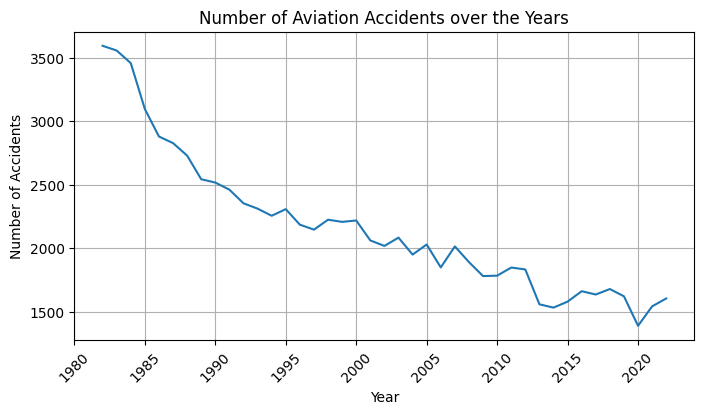

In [22]:
# Let's have a look at the line plot of US aviation accidents over years starting 1982 

aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df_filtered = aviation_df[aviation_df['Year'] >= 1982]

accidents_by_year = aviation_df_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


As per the finding the rate of accidents has reduced indicating better safety in aircrafts over the years.

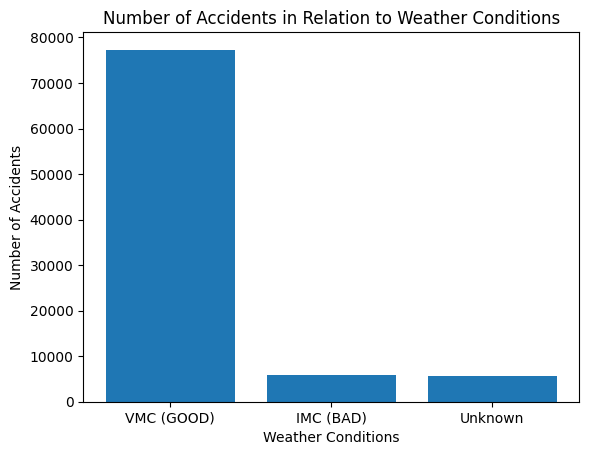

In [23]:
bar_chart_title = "Number of Accidents in Relation to Weather Conditions"

fig, ax = plt.subplots()

x = aviation_df['Weather.Condition'].value_counts().index  # Unique weather conditions
y = aviation_df['Weather.Condition'].value_counts().values  # Count of each condition


ax.bar(x, y)

ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Weather Conditions')
ax.set_title(bar_chart_title)

plt.show()

Bad weather conditions were not a major contributing factor to the number of accidents.

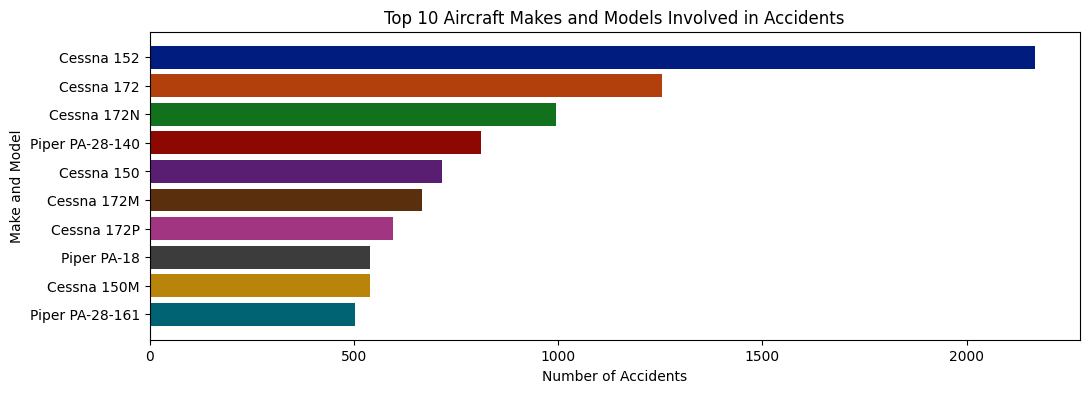

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

# looking at the relationship between Makes, Models and engine types with accidents 
make_model_accidents = aviation_df.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accidents = make_model_accidents.sort_values(by='AccidentCount', ascending=False)

top_10_make_model = make_model_accidents.head(10)
colors = sns.color_palette("dark", len(top_10_make_model))
ax.barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color=colors)
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make and Model')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
ax.invert_yaxis()

# Cessna152, Cessna172, Cessna172N invoved in more accidents. This might be due to the populariy of these models
# but more investigation must be conducted.
# There also seems to be a strong connection between engine type and number of accidents. But again, this 
# can be because of high number of them being in operation

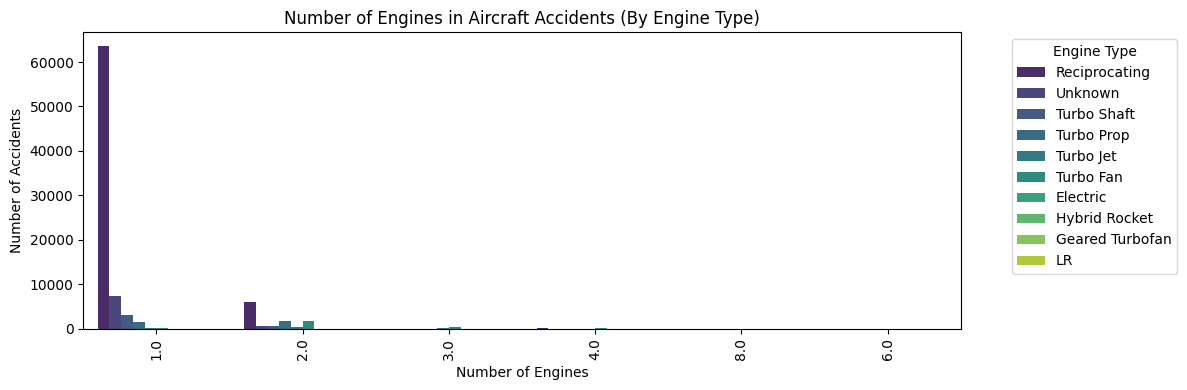

In [25]:
# Plotting a bar graph to determine the number and types of engines that were involved in accidents
aviation_df['Number.of.Engines'] = aviation_df['Number.of.Engines'].replace(0.0, np.nan)

fig, ax = plt.subplots(figsize=(12, 4))

sns.countplot(data=aviation_df, 
              x='Number.of.Engines', 
              hue='Engine.Type',  # Grouping by Engine Type
              order=aviation_df['Number.of.Engines'].value_counts().index, 
              palette='viridis', 
              ax=ax)

ax.set_title('Number of Engines in Aircraft Accidents (By Engine Type)')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Number of Engines')
ax.tick_params(axis='x', rotation=90)
ax.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


The fewer the engines the higher the number of accidents. This could possibly be due to the fact that they are more accessible for personal use or are more readily available but ould need to be explored farther.

/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_42953/3205040445.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_10_recent['AccidentCount'], y=top_10_recent['Make'], palette='Reds_r')
/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_42953/3205040445.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_10_historical['AccidentCount'], y=top_10_historical['Make'], palette='Blues_r')


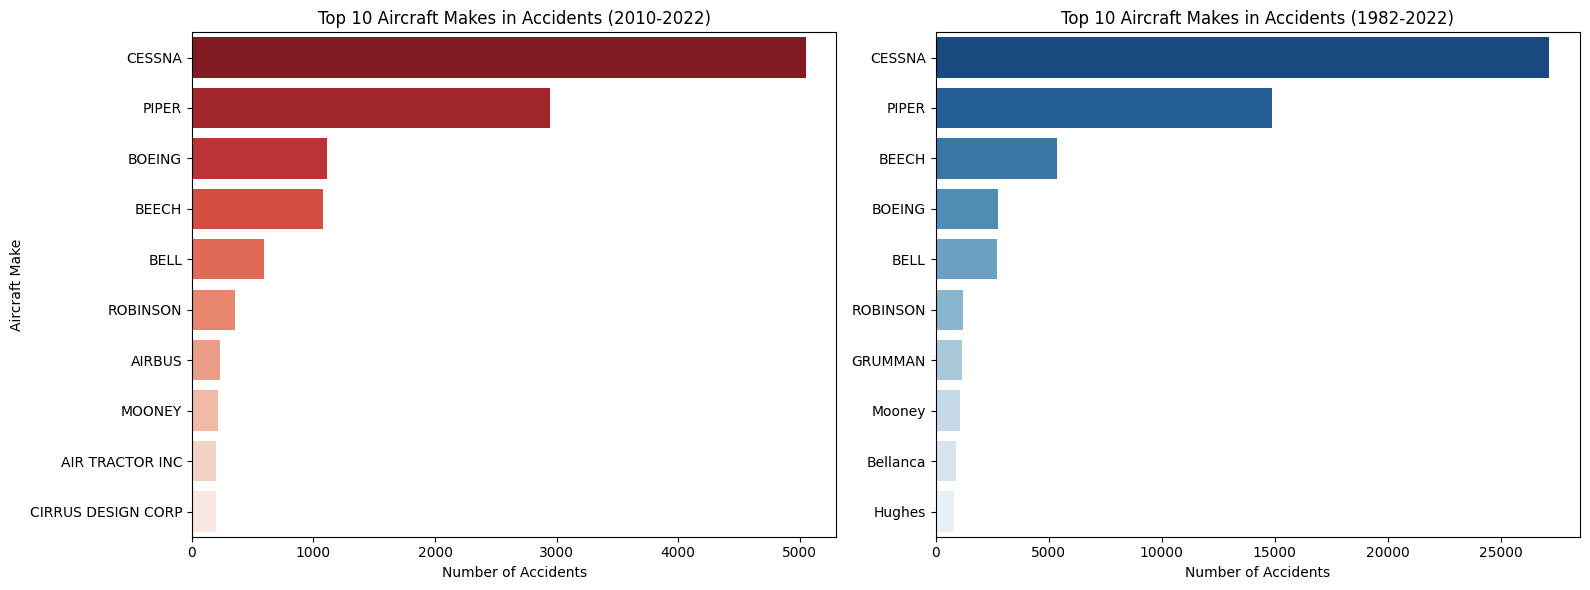

In [26]:
# Ensuring consistent capitalization
aviation_df['Make'] = aviation_df['Make'].replace({
    'Cessna': 'CESSNA', 
    'Piper': 'PIPER', 
    'Boeing': 'BOEING', 
    'Beech': 'BEECH', 
    'Grumman': 'GRUMMAN', 
    'Robinson': 'ROBINSON', 
    'Bell': 'BELL'
})

# Filter dataset for both time periods
aviation_recent = aviation_df[(aviation_df['Year'] >= 2010) & (aviation_df['Year'] <= 2022)]
aviation_historical = aviation_df[(aviation_df['Year'] >= 1982) & (aviation_df['Year'] <= 2022)]

# Get the top 10 makes for both time periods
top_10_recent = aviation_recent['Make'].value_counts().head(10).reset_index()
top_10_recent.columns = ['Make', 'AccidentCount']

top_10_historical = aviation_historical['Make'].value_counts().head(10).reset_index()
top_10_historical.columns = ['Make', 'AccidentCount']

# Set up side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 2010-2022
sns.barplot(ax=axes[0], x=top_10_recent['AccidentCount'], y=top_10_recent['Make'], palette='Reds_r')
axes[0].set_title('Top 10 Aircraft Makes in Accidents (2010-2022)')
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Aircraft Make')

# Plot for 1982-2022
sns.barplot(ax=axes[1], x=top_10_historical['AccidentCount'], y=top_10_historical['Make'], palette='Blues_r')
axes[1].set_title('Top 10 Aircraft Makes in Accidents (1982-2022)')
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The top 5 aircrafts makes with the most accidents have remained the same since 1982-2022 and over the last 12 years. In the bottom 5 for recent times we see a change in the more frequesnt makes listed.

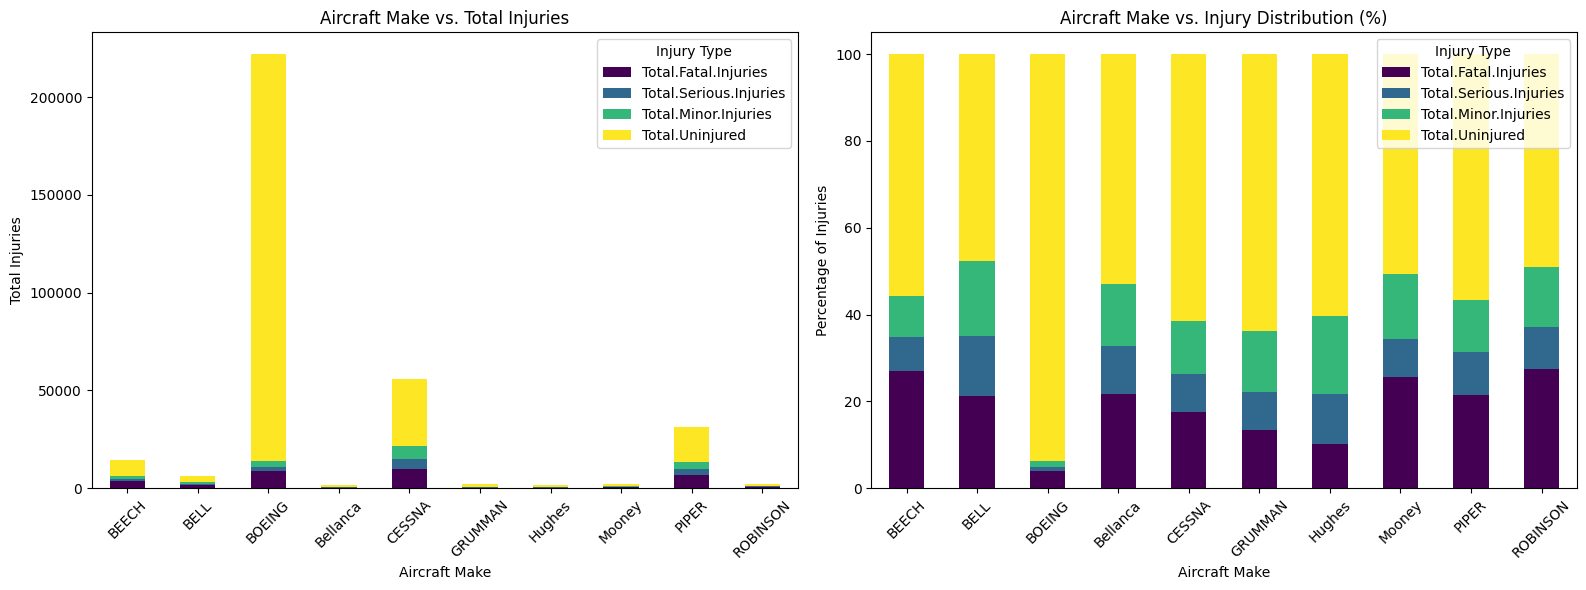

In [27]:
# Get top 10 aircraft makes with most incidents
top_10_makes = aviation_df['Make'].value_counts().head(10).index
filtered_df = aviation_df[aviation_df['Make'].isin(top_10_makes)]

# Define injury-related columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injuries_by_make = filtered_df.groupby('Make')[injury_cols].sum()

# Convert to percentages for a 100% stacked bar chart
injuries_by_make_pct = injuries_by_make.div(injuries_by_make.sum(axis=1), axis=0) * 100

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute values plot
injuries_by_make.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0])
axes[0].set_ylabel('Total Injuries')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_title('Aircraft Make vs. Total Injuries')
axes[0].legend(title='Injury Type')
axes[0].tick_params(axis='x', rotation=45)

# Percentage (100% stacked) plot
injuries_by_make_pct.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
axes[1].set_ylabel('Percentage of Injuries')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_title('Aircraft Make vs. Injury Distribution (%)')
axes[1].legend(title='Injury Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Looking at the top 10 makes Boeing stood out in regards to the number of uninjured passengers against the number of incidients implying more safety with this make.

In [28]:
aviation_df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

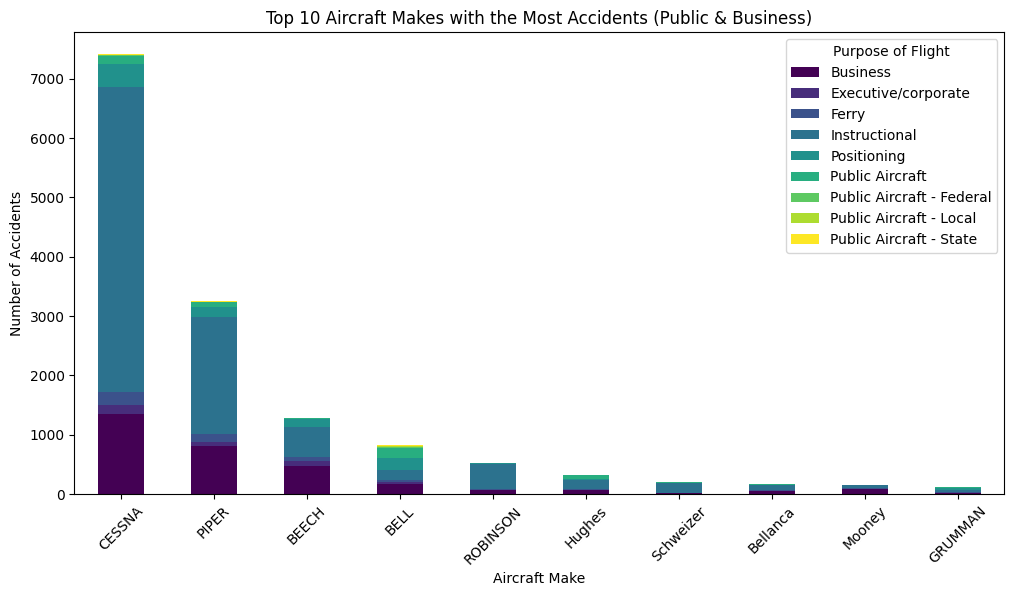

In [29]:
# Define categories related to public and business flight purposes
public_purposes = ['Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local', 'Public Aircraft - State']
business_purposes = ['Business', 'Executive/corporate', 'Instructional', 'Ferry', 'Positioning']

# Filter the dataset to include only relevant flight purposes
filtered_df = aviation_df[aviation_df['Purpose.of.flight'].isin(public_purposes + business_purposes)]

# Count the number of accidents per aircraft make for these categories
accidents_by_make = filtered_df.groupby(['Make', 'Purpose.of.flight']).size().unstack(fill_value=0)

# Select the top 10 aircraft makes with the most accidents
top_10_makes = accidents_by_make.sum(axis=1).nlargest(10).index
top_10_accidents = accidents_by_make.loc[top_10_makes]

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
top_10_accidents.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Formatting
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Aircraft Make')
ax.set_title('Top 10 Aircraft Makes with the Most Accidents (Public & Business)')
ax.legend(title='Purpose of Flight')
plt.xticks(rotation=45)
plt.show()



In [31]:
# creating a cleaned version of the dataset

aviation_df.to_csv('AviationData_cleaned.csv', index=False)


## Conclusion

Analysis of the dataset reveals a steady decline in aviation accidents over the years, likely indicating improvements in safety measures across the industry.

Key insights include:

- Weather Conditions: Bad weather contributed to less than 10% of recorded accidents, suggesting that most incidents were due to other factors.
- Flight Purpose: Among different flight purposes, instructional flights posed the highest risk, while executive/corporate flights had significantly lower accident rates.
- Engine Type & Risk: Aircraft with reciprocating engines recorded the highest number of accidents Additionally, planes with fewer engines (especially between one and two) had a higher accident rate.
- Aircraft Manufacturers: While Boeing appeared in the top 10 for most accidents, it outperformed other manufacturers in terms of passenger survival rates. Conversely, Cessna emerged as the riskiest aircraft make, recording the highest number of accidents.

We would need to look at the total flights done by the brands that stand out to get more of a comparative analysis of successful flights and those with accidents to get a better understandong of the proportion and probaility and expand the geographical focus.
